In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
import yfinance as yf
import pandas_datareader.data as pdr
import scipy.stats as sc
import statsmodels as st 
yf.pdr_override()

In [2]:
df= pdr.get_data_yahoo(['SPY', 'RWR', 'TLT'], start='2010-01-01', end='2022-12-30')

[*********************100%***********************]  3 of 3 completed


In [3]:
dfret= np.log(df['Adj Close']/df['Adj Close'].shift(1)).dropna()

In [4]:
import fitter
from fitter import Fitter

Fitting 4 distributions: 100%|███████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  9.80it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,105.910724,576.273154,-11204.176810,inf,0.025128,3.159851e-02
t,209.365572,241.868588,-8966.945349,inf,0.018277,2.218583e-01
logistic,884.415455,897.096546,-4262.034042,inf,0.053577,1.334803e-08
norm,2383.184408,2231.674394,-1019.603168,inf,0.104942,8.061549e-32


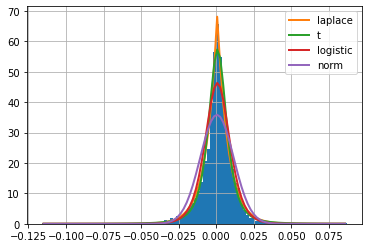

In [5]:
f= Fitter(dfret['SPY'], distributions=['norm', 't', 'laplace', 'logistic'])
f.fit()
f.summary()

Fitting 4 distributions: 100%|███████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.97it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
logistic,231.596691,357.272977,-8644.943323,inf,0.018272,0.222129
t,234.101206,216.883333,-8601.667372,inf,0.019017,0.185226
norm,575.716434,1105.035174,-5666.312566,inf,0.036840,0.000271
laplace,954.335195,150.471939,-4013.150051,inf,0.045785,0.000002


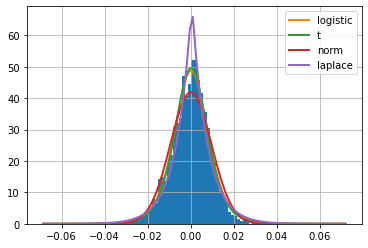

In [6]:
f= Fitter(dfret['TLT'], distributions=['norm', 't', 'laplace', 'logistic'])
f.fit()
f.summary()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.01it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
t,52.871057,485.179792,-13468.580004,inf,0.017945,2.399759e-01
laplace,176.011499,1046.096757,-9542.663151,inf,0.029077,7.764688e-03
logistic,199.610256,1542.587696,-9131.114384,inf,0.038137,1.434738e-04
cauchy,374.316746,145.246538,-7074.520207,inf,0.054796,5.610948e-09
norm,925.591740,4694.072638,-4113.182843,inf,0.087114,4.781907e-22


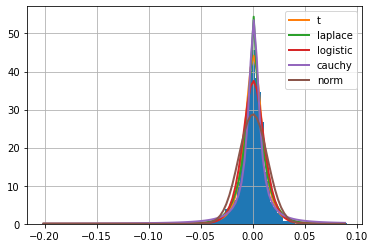

In [7]:
f= Fitter(dfret['RWR'], distributions=['norm', 't', 'laplace', 'logistic','cauchy'])
f.fit()
f.summary()

(0.00023237828555045987, 0.005111905386074365)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


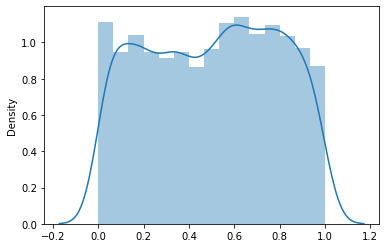

In [8]:
params1 = sc.distributions.logistic.fit(dfret['TLT'])
logistic = sc.distributions.logistic(params1[0], params1[1])
print(params1)

ret1_trans = logistic.cdf(dfret['TLT'])
p1 = sb.distplot(ret1_trans, label = 'Bond')


(0.0006546383407467199, 0.007308487002018732)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


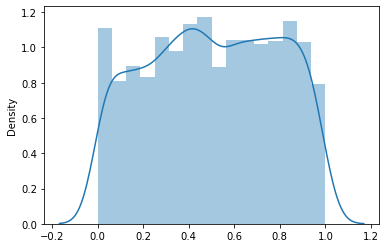

In [9]:
params2 = sc.distributions.laplace.fit(dfret['SPY'])
laplace = sc.distributions.laplace(params2[0], params2[1])
print(params2)

ret2_trans = laplace.cdf(dfret['SPY'])
p2 = sb.distplot(ret2_trans, label = 'Stock')


(3.009636183320008, 0.0008534137500935154, 0.00832216067152847)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


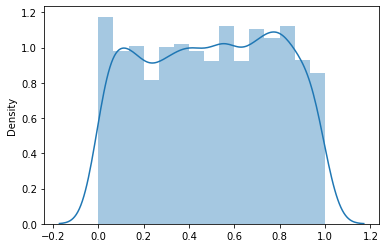

In [10]:
params3 = sc.distributions.t.fit(dfret['RWR'])
t = sc.distributions.t(params3[0], params3[1], params3[2])
print(params3)

ret3_trans = t.cdf(dfret['RWR'])
p3 = sb.distplot(ret3_trans, label = 'Real Estate')


(0.00023237828555045987, 0.005111905386074365)
(0.0006546383407467199, 0.007308487002018732)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(3.009636183320008, 0.0008534137500935154, 0.00832216067152847)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


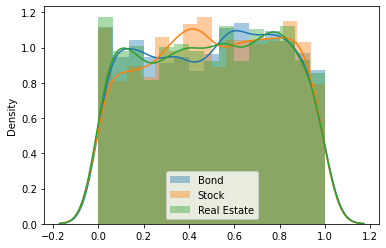

In [11]:
params1 = sc.distributions.logistic.fit(dfret['TLT'])
logistic = sc.distributions.logistic(params1[0], params1[1])
print(params1)

ret1_trans = logistic.cdf(dfret['TLT'])
p1 = sb.distplot(ret1_trans, label = 'Bond')

params2 = sc.distributions.laplace.fit(dfret['SPY'])
laplace = sc.distributions.laplace(params2[0], params2[1])
print(params2)

ret2_trans = laplace.cdf(dfret['SPY'])
p2 = sb.distplot(ret2_trans, label = 'Stock')

params3 = sc.distributions.t.fit(dfret['RWR'])
t = sc.distributions.t(params3[0], params3[1], params3[2])
print(params3)

ret3_trans = t.cdf(dfret['RWR'])
p3 = sb.distplot(ret3_trans, label = 'Real Estate')
plt.legend()
plt.show()


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


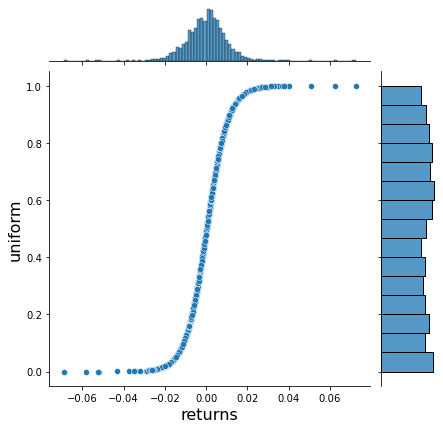

In [12]:
cdf_trans1 = sb.jointplot(dfret['TLT'], ret1_trans)
cdf_trans1.set_axis_labels('returns', 'uniform', fontsize=16);

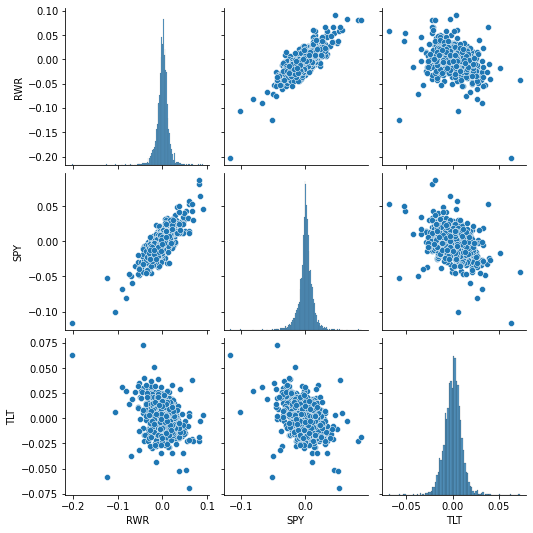

In [13]:
sb.pairplot(dfret)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


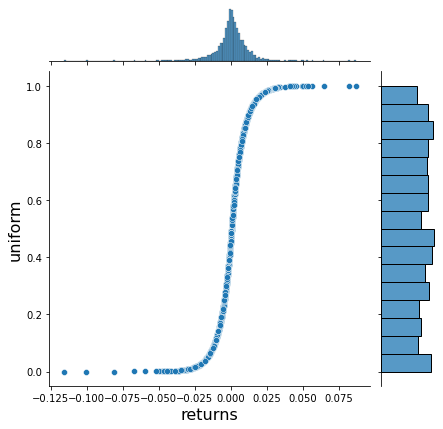

In [14]:
cdf_trans2 = sb.jointplot(dfret['SPY'], ret2_trans)
cdf_trans2.set_axis_labels('returns', 'uniform', fontsize=16);

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


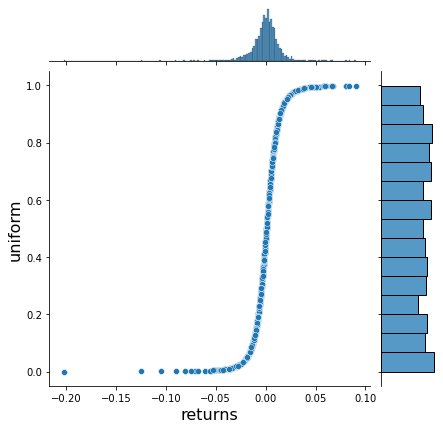

In [15]:
cdf_trans3 = sb.jointplot(dfret['RWR'], ret3_trans)
cdf_trans3.set_axis_labels('returns', 'uniform', fontsize=16);

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


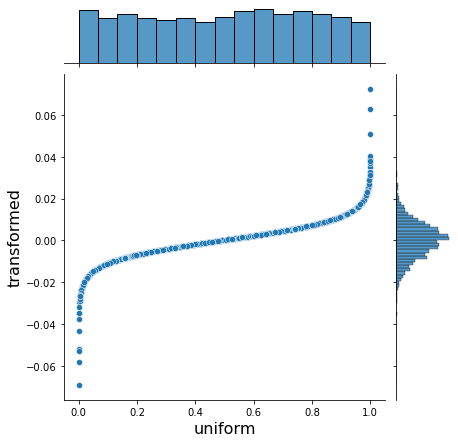

In [16]:
ret1_ppf = logistic.ppf(ret1_trans)
ppf_trans1 = sb.jointplot(ret1_trans, ret1_ppf)
ppf_trans1.set_axis_labels('uniform', 'transformed', fontsize=16);

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


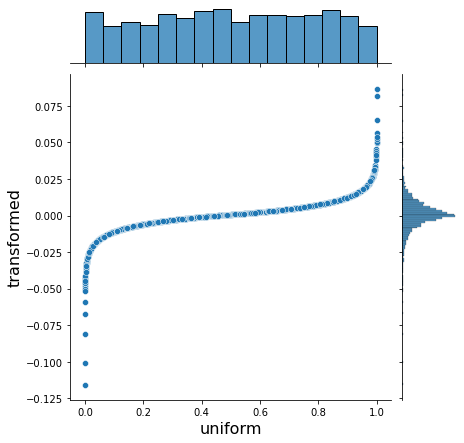

In [17]:
ret2_ppf = laplace.ppf(ret2_trans)
ppf_trans2 = sb.jointplot(ret2_trans, ret2_ppf)
ppf_trans2.set_axis_labels('uniform', 'transformed', fontsize=16);

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


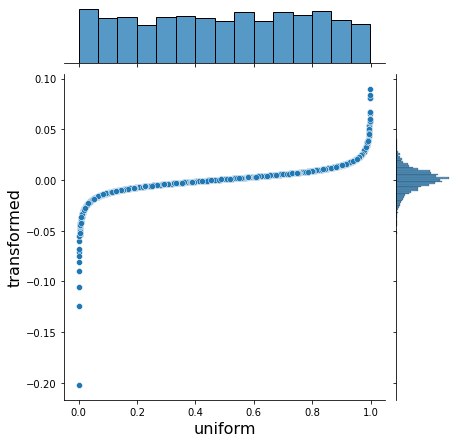

In [18]:
ret3_ppf = t.ppf(ret3_trans)
ppf_trans3 = sb.jointplot(ret3_trans, ret3_ppf)
ppf_trans3.set_axis_labels('uniform', 'transformed', fontsize=16);

In [19]:
ret3_ppf = t.ppf(ret3_trans)
ret3_ppf

array([-0.00448107,  0.0008165 , -0.000612  , ..., -0.00022874,
       -0.01835766,  0.02109955])

In [20]:
ret2_ppf = logistic.ppf(ret2_trans)
ret2_ppf

array([ 0.01479268,  0.00271607,  0.00030101, ..., -0.00495005,
       -0.01207527,  0.01554671])

In [21]:
ret2_ppf.shape

(3271,)

In [22]:
dfret.describe()

,RWR,SPY,TLT
count,3271.000000,3271.000000,3271.000000
mean,0.000309,0.000454,0.000139
std,0.013862,0.011132,0.009510
min,-0.202247,-0.115887,-0.069011
25%,-0.005634,-0.003737,-0.005485
50%,0.000930,0.000655,0.000563
75%,0.007123,0.005736,0.005753
max,0.090170,0.086731,0.072503


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


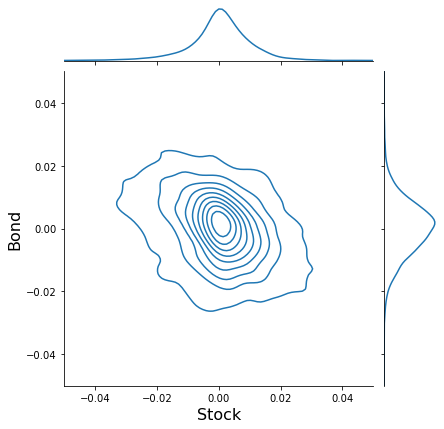

In [23]:
returns_kde = sb.jointplot(dfret['SPY'], dfret['TLT'], kind='kde');
returns_kde.ax_marg_x.set_xlim(-0.05,0.05)
returns_kde.ax_marg_y.set_ylim(-0.05,0.05)
returns_kde.set_axis_labels('Stock', 'Bond', fontsize=16);


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


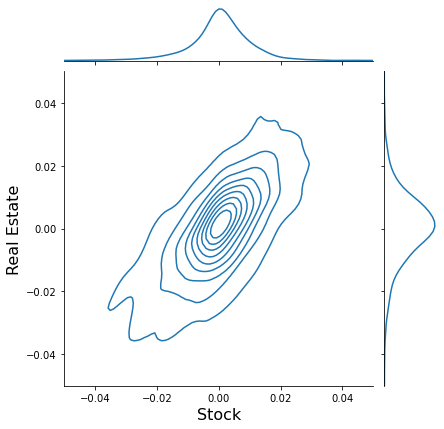

In [24]:
returns_kde = sb.jointplot(dfret['SPY'], dfret['RWR'], kind='kde');
returns_kde.ax_marg_x.set_xlim(-0.05,0.05)
returns_kde.ax_marg_y.set_ylim(-0.05,0.05)
returns_kde.set_axis_labels('Stock', 'Real Estate', fontsize=16);


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


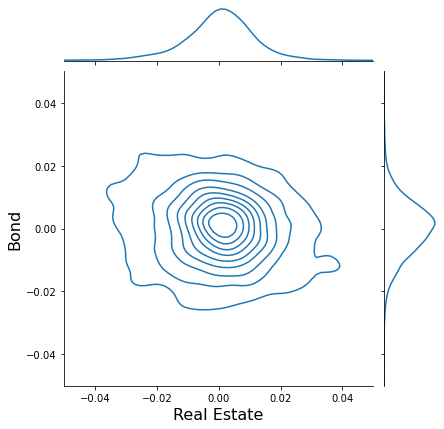

In [25]:
returns_kde = sb.jointplot(dfret['RWR'], dfret['TLT'], kind='kde');
returns_kde.ax_marg_x.set_xlim(-0.05,0.05)
returns_kde.ax_marg_y.set_ylim(-0.05,0.05)
returns_kde.set_axis_labels('Real Estate', 'Bond', fontsize=16);


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


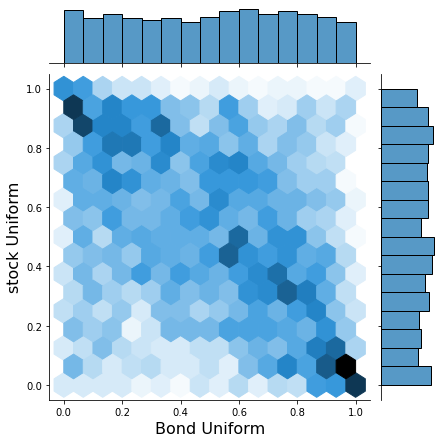

In [26]:
returns_unif = sb.jointplot(ret1_trans, ret2_trans, kind='hex')
returns_unif.set_axis_labels('Bond Uniform', 'stock Uniform', fontsize=16);

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


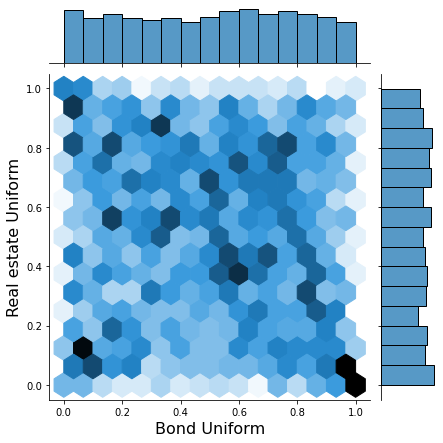

In [27]:
returns_unif = sb.jointplot(ret1_trans, ret3_trans, kind='hex')
returns_unif.set_axis_labels('Bond Uniform', 'Real estate Uniform', fontsize=16);

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


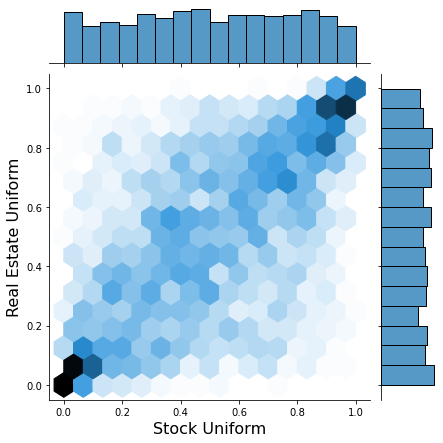

In [28]:
returns_unif = sb.jointplot(ret2_trans, ret3_trans, kind='hex')
returns_unif.set_axis_labels('Stock Uniform', 'Real Estate Uniform', fontsize=16);

In [11]:
sc.probplot(dfret['TLT'], dist=sc.t, plot=plt)

TypeError: _parse_args() missing 1 required positional argument: 'df'

In [12]:
tdf, tmean, tsigma= sc.t

TypeError: cannot unpack non-iterable t_gen object